📒 [NB 3-1] 단변량 분석 (Univariate Analysis)
1. 환경 설정 및 데이터 생성
단변량 분석은 '변수 하나'의 분포를 깊이 있게 파악하는 과정이다. 의료비(Medical Cost)와 같이 정규분포를 따르지 않는(Skewed) 데이터와, 혈당(Glucose)처럼 정규분포에 가까운 데이터를 생성하여 비교한다.

In [1]:
!pip install pandas numpy seaborn matplotlib scipy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 데이터 생성 (환자 500명)
np.random.seed(42)
n = 500

data = {
    'Patient_ID': [f'P{i:03d}' for i in range(n)],
    'Age': np.random.randint(20, 90, n),
    # 공복 혈당: 평균 100, 표준편차 15인 정규분포
    'Glucose': np.random.normal(100, 15, n),
    # 진료비: 오른쪽 꼬리가 긴 분포 (Log-normal distribution) - 의료비 데이터의 전형적 특징
    'Medical_Cost': np.random.lognormal(mean=10, sigma=1, size=n)
}

df = pd.DataFrame(data)

print("데이터 미리보기:")
display(df.head())
print("\n기초 통계량:")
display(df.describe())

데이터 미리보기:


,Patient_ID,Age,Glucose,Medical_Cost
0,P000,71,121.656208,50591.697344
1,P001,34,71.276389,27108.773185
2,P002,80,112.779167,18973.733233
3,P003,40,111.525092,11391.088163
4,P004,43,108.320392,13679.071267



기초 통계량:


,Age,Glucose,Medical_Cost
count,500.000000,500.000000,500.000000
mean,54.272000,100.897667,41547.751345
std,20.537029,15.991149,55096.202068
min,20.000000,58.230465,1619.962382
25%,36.000000,89.828616,12041.089533
50%,54.000000,100.825564,23202.546810
75%,72.250000,112.133213,48904.945152
max,89.000000,144.642954,523018.268195


2. 수치형 변수의 분포 시각화 (Histogram & KDE)
데이터의 생김새(Shape)를 확인한다.

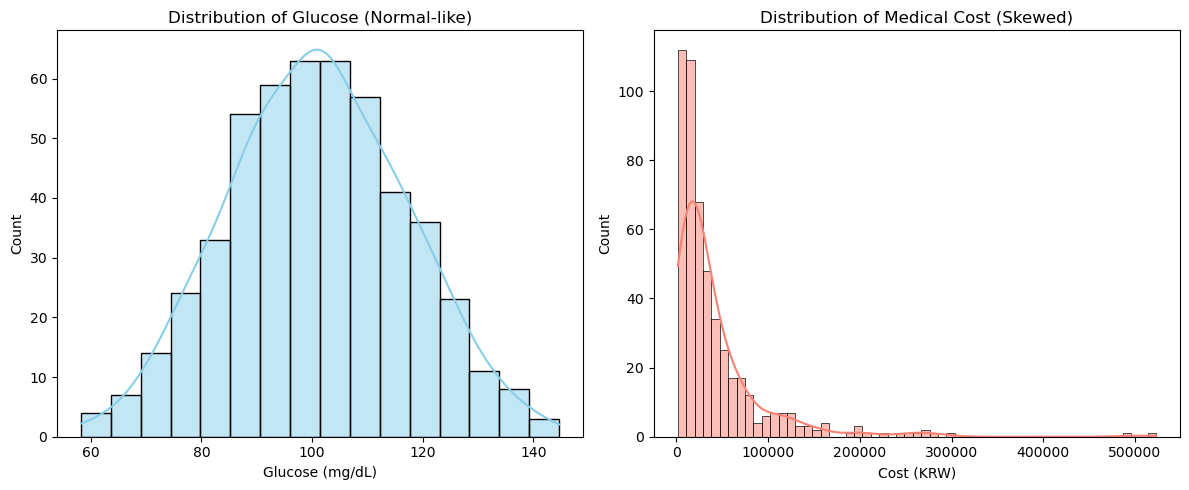

In [2]:
# 1. 정규분포에 가까운 데이터 (혈당)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='skyblue')
plt.title('Distribution of Glucose (Normal-like)')
plt.xlabel('Glucose (mg/dL)')

# 2. 치우친 데이터 (진료비)
plt.subplot(1, 2, 2)
sns.histplot(df['Medical_Cost'], kde=True, color='salmon')
plt.title('Distribution of Medical Cost (Skewed)')
plt.xlabel('Cost (KRW)')

plt.tight_layout()
plt.show()

3. 중심 경향성 파악 (평균 vs 중앙값)
치우친 데이터에서 평균(Mean)이 왜곡될 수 있음을 확인한다.

In [3]:
cost_mean = df['Medical_Cost'].mean()
cost_median = df['Medical_Cost'].median()

print(f"진료비 평균(Mean): {cost_mean:,.0f} 원")
print(f"진료비 중앙값(Median): {cost_median:,.0f} 원")
print(f"차이: {cost_mean - cost_median:,.0f} 원")

if cost_mean > cost_median:
    print("해석: 평균이 중앙값보다 크므로, 고액 진료비를 내는 소수의 환자가 평균을 끌어올리고 있다 (Right Skewed).")

진료비 평균(Mean): 41,548 원
진료비 중앙값(Median): 23,203 원
차이: 18,345 원
해석: 평균이 중앙값보다 크므로, 고액 진료비를 내는 소수의 환자가 평균을 끌어올리고 있다 (Right Skewed).


4. 이상치 확인을 위한 Boxplot
데이터의 퍼짐 정도와 이상치(Outlier) 존재 여부를 확인한다.

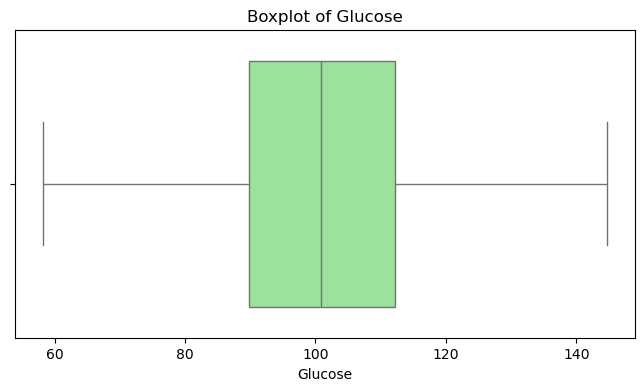

In [4]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Glucose'], color='lightgreen')
plt.title('Boxplot of Glucose')
plt.show()

# 해석: Box 바깥에 찍힌 점들이 통계적 이상치이다.